In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("talk")

import matplotlib
from matplotlib import cm
import plotly.express as px

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")

In [4]:
import geopandas as gpd

In [5]:
df = pd.read_csv('covid19 dataset/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)
#df.head()

#importing tests dataset
tests = pd.read_csv('covid19 dataset/StatewiseTestingDetails.csv' )

#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'State','cured','deaths','confirmed']

In [6]:
df.head()

,date,State,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [7]:
#current date
today = df[df.date == '2020-07-10']
today.head(10)

,date,State,cured,deaths,confirmed
3927,2020-07-10,Andaman and Nicobar Islands,83,0,151
3928,2020-07-10,Andhra Pradesh,12154,277,23814
3929,2020-07-10,Arunachal Pradesh,120,2,302
3930,2020-07-10,Assam,8729,22,14032
3931,2020-07-10,Bihar,9816,115,13944
3932,2020-07-10,Chandigarh,403,7,523
3933,2020-07-10,Chhattisgarh,2903,15,3675
3934,2020-07-10,Dadra and Nagar Haveli and Daman and Diu,189,0,411
3935,2020-07-10,Delhi,82226,3258,107051
3936,2020-07-10,Goa,1273,9,2151


In [8]:
gdf = gpd.read_file('india_states//Indian_States.shp')
#gdf

gdf['st_nm'].replace({"Andaman & Nicobar Island": "Andaman and Nicobar Islands",
                      "Arunanchal Pradesh": "Arunachal Pradesh",
                      'Dadara & Nagar Havelli':'Dadra and Nagar Haveli and Daman and Diu',
                      'Jammu & Kashmir':'Jammu and Kashmir',
                      'NCT of Delhi':'Delhi'}, inplace=True)

merged = gdf.merge(today ,  left_on='st_nm', right_on='State')

In [9]:
merged.State.replace({"Andaman and Nicobar Islands" : "A & N",
                      'Dadra and Nagar Haveli and Daman and Diu' : 'Daman & Diu',
                      'Jammu and Kashmir' : 'J & K'
                      }, inplace=True)

In [10]:
merged.geometry.representative_point()[:5]

0    POINT (92.83153 12.61158)
1    POINT (95.03200 28.05511)
2    POINT (90.76265 26.05223)
3    POINT (86.12533 25.90266)
4    POINT (76.78051 30.73018)
dtype: geometry

In [11]:
merged['coords'] = merged['geometry'].apply(lambda x : x.representative_point().coords[:])

In [12]:
#merged.head()

In [13]:
merged['coords'] = [coords[0] for coords in merged['coords']]

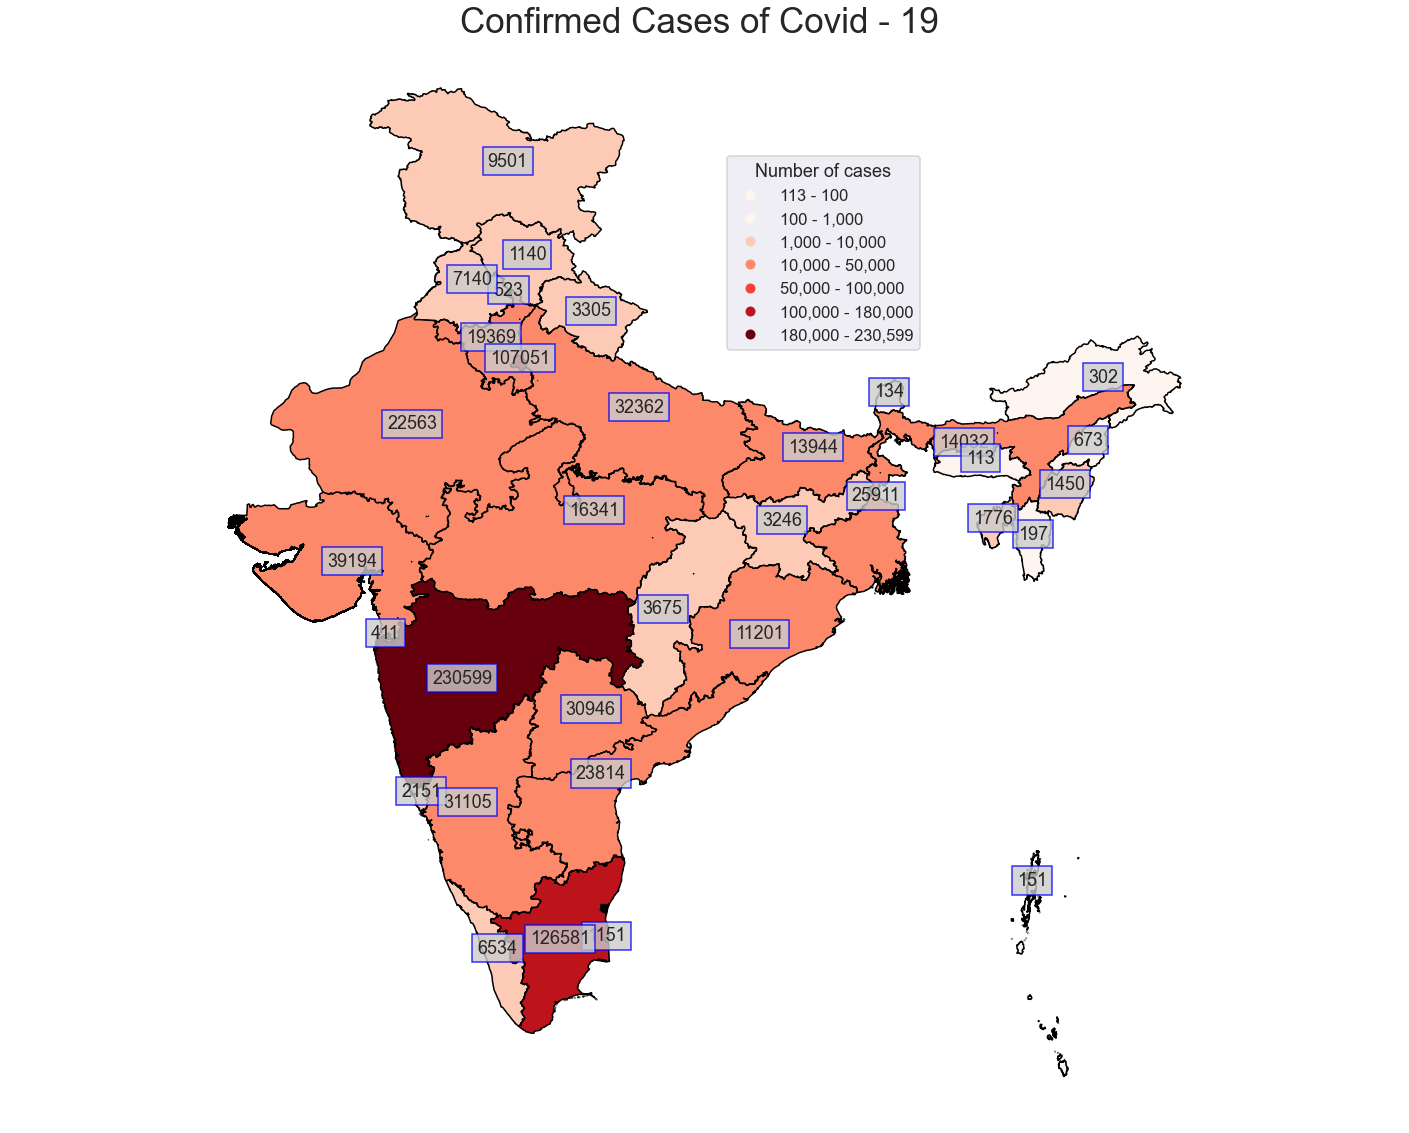

In [14]:

sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Reds'
figsize = (25, 20)
ax = merged.plot(column= 'confirmed', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000,180000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['confirmed'], 
           horizontalalignment='center', bbox={'facecolor': '#cccccc', 
                                               'alpha':0.8, 'pad': 5, 'edgecolor':'blue'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of cases')
ax.set_title("Confirmed Cases of Covid - 19 ", size = 35)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)


#a = ax.text(65, 35, 'Total Cases \n 529,577',
           # fontsize=25,
           # )


ax.set_axis_off()
plt.axis('equal')
plt.show()

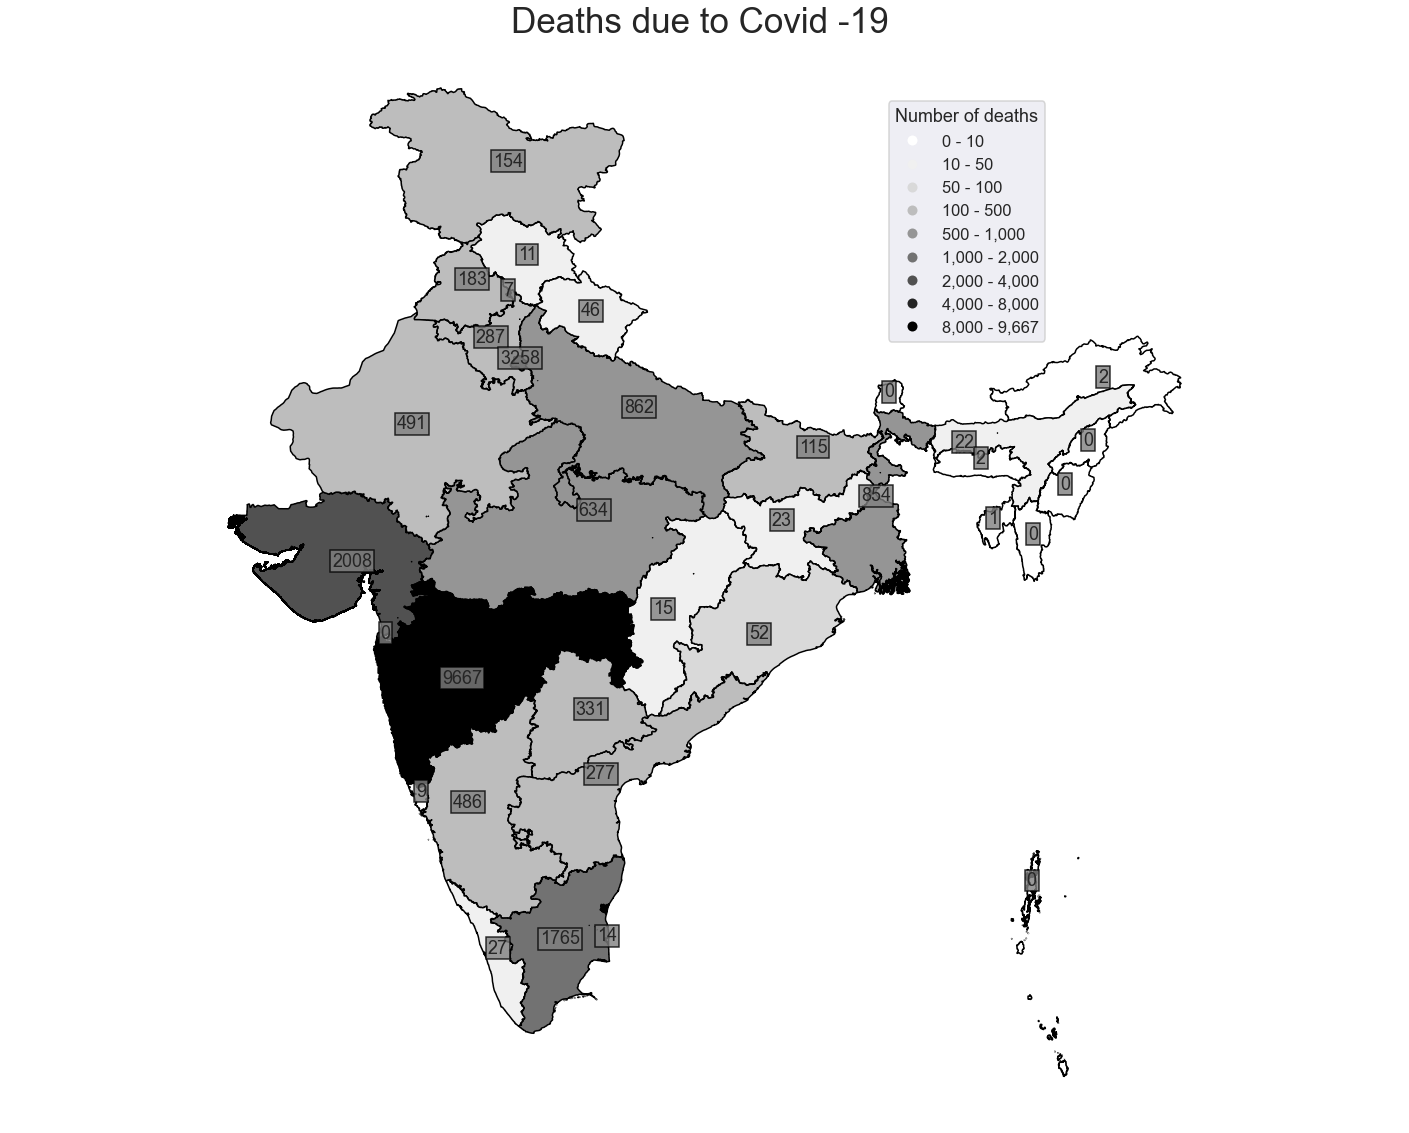

In [15]:
sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Greys'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'deaths', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[10,50,100,500,1000,2000,4000,8000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['deaths'], 
           horizontalalignment='center', bbox={'facecolor': 'gray', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.75,0.95))
ax.get_legend().set_title('Number of deaths')
ax.set_title("Deaths due to Covid -19 ", size = 35)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)
#a = ax.text(65, 35, 'Total Deaths \n 16,103',
            #fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

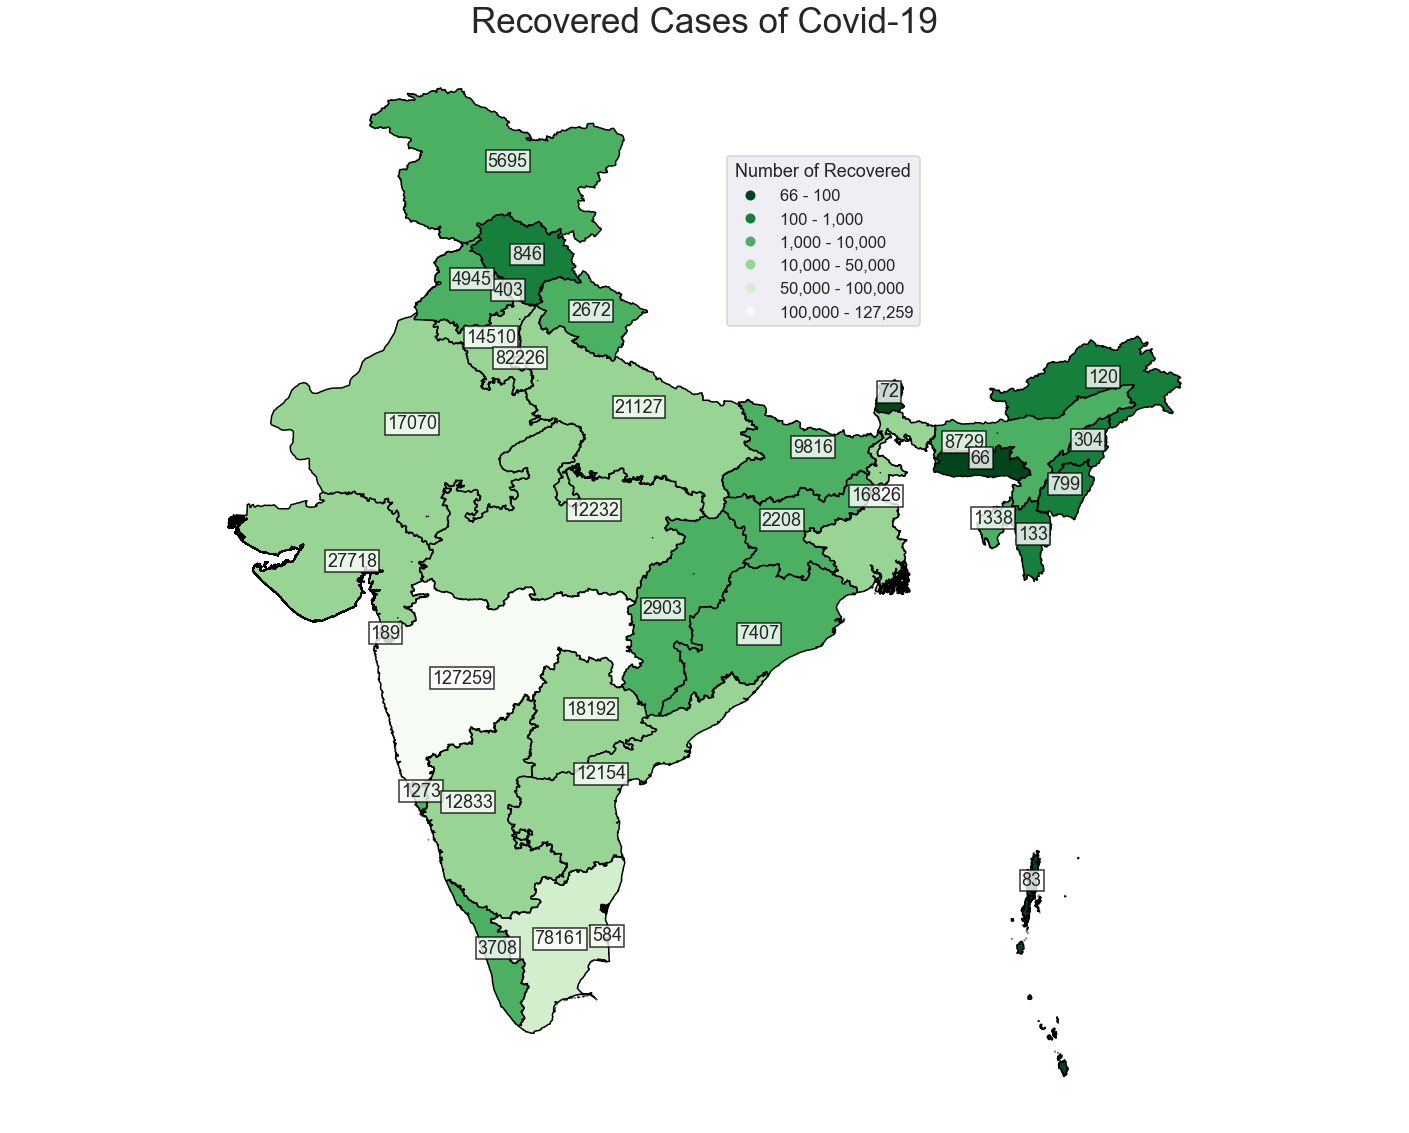

In [16]:
sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('fivethirtyeight')
cmap = 'Greens_r'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'cured', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[100,1000,10000,50000,100000]),
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['cured'], 
           horizontalalignment='center', bbox={'facecolor': 'white', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Number of Recovered')
ax.set_title("Recovered Cases of Covid-19", size = 35)
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

#a = ax.text(65, 35, 'Total Recovered \n 310,146',
           # fontsize=25,
            #)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [17]:
merged['dcratio'] = merged['deaths'] / merged['confirmed'] * 100
merged.dcratio = merged.dcratio.round(2)

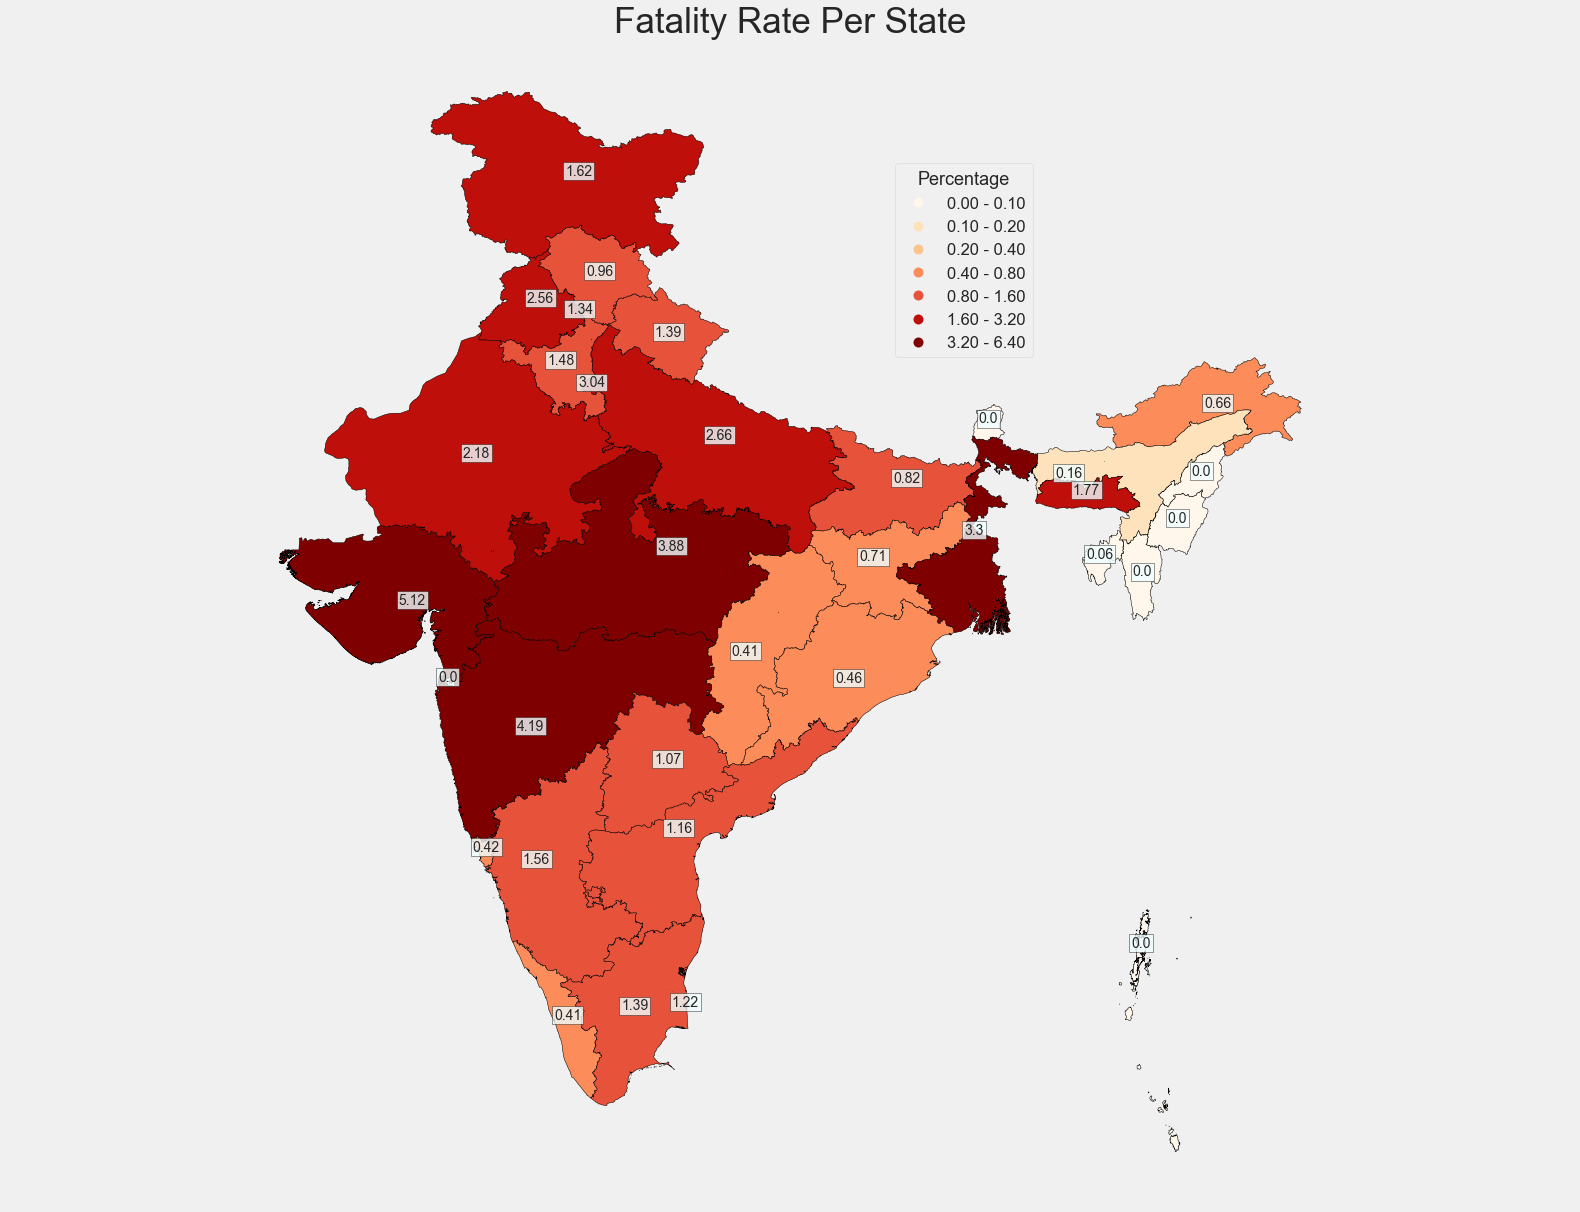

In [18]:
sns.set_context("talk")
sns.set_style("dark")
plt.style.use('fivethirtyeight')
cmap = 'OrRd'
figsize = (25, 20)
ax = merged.dropna().plot(column= 'dcratio', cmap=cmap, 
                          figsize=figsize, scheme='User_Defined',
                          classification_kwds=dict(bins=[0.1 , 0.2 , 0.4 , 0.8 , 1.6 , 3.2 , 6.4]),
                          
                          edgecolor='black', legend = True)

for idx, row in merged.iterrows():
    ax.text(row.coords[0], row.coords[1], s=row['dcratio'], 
           horizontalalignment='center', bbox={'facecolor': 'azure', 
                                               'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.66,0.9))
ax.get_legend().set_title('Percentage')
ax.set_title("Fatality Rate Per State", size = 35)

#a = ax.text(61, 35, 'Total Death/Confirmed \n percentage \n 3.05',
           # fontsize=25,
           # )
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [19]:
confirmed = merged.sort_values('confirmed', ascending = True)
#confirmed
highc = confirmed.tail(10)
lowc = confirmed.head(10)

fig = px.bar(confirmed, x="confirmed", y="State", orientation='h', text = 'confirmed')
fig.update_layout(
    title_text='<b>Confirmed cases of Covid-19 per State <b>',
    title_x=0.5,
    paper_bgcolor='#abcdef',
    plot_bgcolor = "#abcdef",
    autosize=False,
    width= 850,
    height=850)

fig.update_traces(marker_color='teal')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.show()

In [20]:
deaths = merged.sort_values('deaths', ascending = True)
deaths = deaths[deaths.deaths > 0 ]
lowd = deaths.head(10)
highd = deaths.tail(10)
fig = px.bar(deaths, x="deaths", y="State", orientation='h', text = 'deaths')
fig.update_layout(
    title_text='<b>Deaths due to covid 19<b>',
    title_x=0.5,
    paper_bgcolor='aqua',
    plot_bgcolor = "aqua",
    autosize=False,
    width=850,
    height= 850)
fig.update_traces(marker_color='#cccccc')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.show()

In [21]:
recovered = merged.sort_values('cured', ascending = True)

low_r = deaths.head(10)
high_r = deaths.tail(10)
fig = px.bar(deaths, x="cured", y="State", orientation='h', text = 'cured')
fig.update_layout(
    title_text='<b>Cases Recovered In covid 19<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    autosize=False,
    width=850,
    height= 850)

fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.show()

In [22]:
merged = merged[merged['dcratio'] > 0.0]
merged = merged.sort_values('dcratio', ascending = True)
fig = px.bar(merged, x="dcratio", y="State", orientation='h', text = 'dcratio')
fig.update_layout(
    title_text='<b>Fatality Rate per State<b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 850,
    height= 850)
fig.update_traces(marker_color='darkred')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

<strong>Inference</strong> : Gujarat has the highest Fatality rate(5.12) even though it has the less number of confirmed cases and death cases. One way to interpret the fatality rate of 5.12 as out of 100 people who got coronavirus around 5 people will succumb to Death. Interestingly Madhya Pradesh and West bengal have high Fatality rate considering they have less confirmed and death cases compared to other states.

<h2>Number of cases daily</h2>

In [23]:
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()

In [24]:
df2

,date,confirmed,deaths,cured
0,2020-01-30,1,0,0
1,2020-01-31,1,0,0
2,2020-02-01,2,0,0
3,2020-02-02,3,0,0
4,2020-02-03,3,0,0
...,...,...,...,...
158,2020-07-06,697413,19693,424433
159,2020-07-07,719665,20160,439948
160,2020-07-08,742417,20642,456831
161,2020-07-09,767296,21129,476378


In [25]:
df2['new_confirmed'] = df2.confirmed.diff()
df2['new deaths'] = df2['deaths'].diff()
df2['new recovered'] = df2['cured'].diff()

In [26]:
df2

,date,confirmed,deaths,cured,new_confirmed,new deaths,new recovered
0,2020-01-30,1,0,0,NaN,NaN,NaN
1,2020-01-31,1,0,0,0.0,0.0,0.0
2,2020-02-01,2,0,0,1.0,0.0,0.0
3,2020-02-02,3,0,0,1.0,0.0,0.0
4,2020-02-03,3,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
158,2020-07-06,697413,19693,424433,24248.0,425.0,15350.0
159,2020-07-07,719665,20160,439948,22252.0,467.0,15515.0
160,2020-07-08,742417,20642,456831,22752.0,482.0,16883.0
161,2020-07-09,767296,21129,476378,24879.0,487.0,19547.0


In [27]:
# taking date 15 march onwards
df2 = df2.iloc[44:]

In [28]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)

fig.update_xaxes(tickfont=dict(family='serif', color='black', size=15))
fig.update_yaxes(tickfont=dict(family='serif', color='black', size=15))
fig.show()

In [29]:
fig = go.Figure(go.Bar(x= df2.date, y= df2['new recovered'], name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2['new deaths'], name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Daily cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)

fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

<strong>Inference :</strong> Above graph contains the data of daily new confirmed , new deaths and new recovered cases. Similar to total cases graph here also daily confirmed and daily recovered cases are increasing exponentially but daily confirmed cases has steeper curve as compared to the curve of daily recovered. Lets see these cases individually.

In [30]:
fig = go.Figure([go.Bar(x= df2.date, y= df2.new_confirmed,marker_color='red',)])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=15))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=15))


fig.update_layout(
    title_text='<b>Daily New Confirmed Cases <b>',
                 title_x=0.5, 
                 paper_bgcolor='salmon',
                 plot_bgcolor = "salmon")
 
fig.show()

In [31]:
fig = go.Figure([go.Bar(x= df2.date, y= df2['new deaths'],marker_color='gray')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(title_text='<b>Daily New Deceased Cases <b>',title_x=0.5, 
                 paper_bgcolor='silver',
                 plot_bgcolor = "silver")

fig.show()

In [32]:
fig = go.Figure([go.Bar(x= df2.date, y= df2['new recovered'],marker_color='mediumseagreen')])
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(
    title_text='<b>Daily New Recovered Cases<b>',
                  title_x=0.5,
                 paper_bgcolor='lightgreen',
                 plot_bgcolor = "lightgreen")

## Statewise analysis

In [33]:
state = list(today['State'])
cases = list(today['confirmed'])

In [34]:
fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Confirmed Cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgoldenrodyellow',
    plot_bgcolor = "lightgoldenrodyellow",
    
    )

fig.show()

<strong>Inference : </strong>From the above treemap, we can see that 58% of the total cases in india are from Maharashtra,Delhi and Tamil Nadu. One Intersting thing to note here is that Gujarat which has only 5% of total cases in India has highest Fatality Rate.

In [35]:
#tips = px.data.tips()
#fig = px.treemap(tips, path=['day', 'time', 'sex'], values='total_bill')
#fig.show()

In [36]:
state = list(today.State)
cases = list(today.deaths)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry",
    marker_colorscale = "greys"
))
fig.update_layout(
    title_text= '<b>Distribution of Deaths in India<b>',
    title_x=0.5,
    paper_bgcolor='slategrey',
    plot_bgcolor = "slategrey",
    
    )

fig.show()

In [37]:
state = list(today.State)
cases = list(today.cured)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry",
    marker_colorscale = "greens"
))
fig.update_layout(
    title_text= '<b>Distribution of recovered cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgreen',
    plot_bgcolor = "lightgreen",
    
    )

fig.show()

In [38]:
highc = highc.sort_values('confirmed', ascending = False)
fig = px.bar(highc, x="State", y="confirmed", text = 'confirmed')
fig.update_layout(
    title_text='<b>Cases in Worst Affeced States <b>',
    title_x=0.5,
    paper_bgcolor='salmon',
    plot_bgcolor = "salmon",
    )
fig.update_traces(marker_color='red')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [39]:
states = ['Maharashtra', 'Delhi', 'Tamil Nadu', 'Gujarat', 'Uttar Pradesh',
       'Rajasthan', 'West Bengal', 'Madhya Pradesh', 'Haryana',
       'Andhra Pradesh']



higha = df[df.State.isin(states)]

In [40]:
import plotly.express as px


fig = px.line(higha, x="date", y="confirmed", color='State')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_traces(mode='lines + markers')
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Confirmed Cases in Worst affected states<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()

In [41]:
highd = highd.sort_values('confirmed', ascending = False)
fig = px.bar(highd, x="State", y="deaths",text='deaths')
fig.update_layout(
    title_text='<b>Deaths in Worst Affeced States <b>',
    title_x=0.5,
    paper_bgcolor='silver',
    plot_bgcolor = "silver",
    )
fig.update_traces(marker_color='grey')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [42]:
fig = px.line(higha, x="date", y="deaths", color='State')
fig.update_traces(mode='lines+markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(legend=dict(x= 0.07, y= 1),
    title_text='<b>Deaths in Highly affected states<b> ',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke")
fig.show()

In [50]:
#Statewise new confirmed
df['new_confirmed'] = df.groupby(['State'])['confirmed'].diff()
df['new_deaths'] = df.groupby(['State'])['deaths'].diff()
df['new_cured'] = df.groupby(['State'])['cured'].diff()

In [51]:
higha = df[df.State.isin(states)]

In [52]:
higha

,date,State,cured,deaths,confirmed,new_confirmed,new_deaths,new_cured
34,2020-03-02,Delhi,0,0,1,NaN,NaN,NaN
36,2020-03-03,Rajasthan,0,0,1,NaN,NaN,NaN
38,2020-03-03,Delhi,0,0,1,0.0,0.0,0.0
39,2020-03-04,Uttar Pradesh,0,0,6,NaN,NaN,NaN
41,2020-03-04,Haryana,0,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3946,2020-07-10,Maharashtra,127259,9667,230599,6875.0,219.0,4067.0
3954,2020-07-10,Rajasthan,17070,491,22563,500.0,9.0,204.0
3956,2020-07-10,Tamil Nadu,78161,1765,126581,4231.0,65.0,3994.0
3960,2020-07-10,Uttar Pradesh,21127,862,32362,1206.0,17.0,796.0


In [53]:
higha = higha[higha.new_confirmed > 0]

In [54]:
states1 = ['Maharashtra','Delhi']

In [55]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 1, cols = 2 , subplot_titles= ['<b>Maharashtra<b>' , '<b>Delhi<b>'] )
for i , state in enumerate(states1):
    highan = higha[higha.State == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.add_annotation(
            xref='x1', 
            yref='y1',
            x= "2020-05-02",
            y= 4500,
            text="Lockdown period",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=14,
            color="blue"
            ),
        align="center",)
    
    fig.add_annotation(
            xref='x2', 
            yref='y2',
            x= "2020-05-02",
            y= 2700,
            text="Lockdown period",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=14,
            color="blue"
            ),
        align="center",)
    
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='tomato',
                     plot_bgcolor = "tomato",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [56]:
states2 = ['Uttar Pradesh','Rajasthan','Haryana','Andhra Pradesh']

In [57]:
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=["<b>Uttar Pradesh<b>","<b>Rajasthan<b>","<b>Haryana<b>",'<b>Andhra Pradesh<b>'] ) 
for i , state in enumerate(states2):
    highan = higha[higha.State == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
   
    
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='tomato',
                     plot_bgcolor = "tomato",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [58]:
states3 = ['Gujarat','Uttar Pradesh','West Bengal','Rajasthan']

In [59]:
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=["<b>Gujarat<b>","<b>Uttar Pradesh<b>","<b>West Bengal<b>",'<b>Rajasthan<b>'] ) 
for i , state in enumerate(states3):
    highan = higha[higha.State == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='blue',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
   
    
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='tomato',
                     plot_bgcolor = "tomato",
                     shapes=[dict(type="rect",xref="x1",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",yref="paper",
                                  x0="2020-03-25",y0=0,x1="2020-05-31",
                                  y1=1,fillcolor="lightyellow",opacity=0.5,
                                  layer="below",line_width=2 ),
                             
                            ]
                     )

fig.show() 

In [60]:
states4 = ['Tamil Nadu', 'West Bengal', 'Gujarat', 'Madhya Pradesh']

In [61]:
fig = make_subplots(rows = 2, cols = 2 , subplot_titles=['<b>Tamil Nadu<b>', '<b>West Bengal<b>', '<b>Gujarat<b>', '<b>Madhya Pradesh<b>'] )
for i , state in enumerate(states4):
    highan = higha[higha.State == state]
    
    
    fig.add_trace(
        go.Bar(x= highan.date, y= highan.new_confirmed, marker_color='purple',name= state),
    row=(i // 2) + 1, col=((i % 2) + 1)
        
    )
    fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
    fig.update_layout(showlegend=False,
                     title_text='<b>Daily New Confirmed Cases<b>',
                     title_x=0.5,
                     paper_bgcolor='aquamarine',
                     plot_bgcolor = "aquamarine",
                     shapes=[dict(type="rect",xref="x1",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightgreen",
                                  opacity=0.5,layer="below",line_width=2 ),
                             dict(type="rect",xref="x2",
                                  yref="paper",x0="2020-03-25",
                                  y0=0,x1="2020-05-31",y1=1,fillcolor="lightgreen",
                                  opacity=0.5,layer="below",line_width=2 ),
                            
                            ]
                     )

fig.show() 

**Inference:** Daily new confirmed cases are increasing daily in Tamil Nadu and West Bengal. The Lockdown hasnt affected the trend of Increasing the daily new cases.

In Gujrat daily new confirmed cases are increasing gradually .Gujrat reported 1057 new cases of coronavirus other than that we can see that in Lockdown Gujrats cases were somewhat increasing slowly and the growth is more after the lockdown was removed.

Its intersting that daily new confirmed cases are decreasing gradually in Madhya Pradesh . The lockdown might be responsible for this decrease.

In [62]:
tests.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        892
Positive          9
dtype: int64

In [63]:
tests.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [64]:
fig = px.line(tests, x="Date", y="TotalSamples", color='State',
             color_discrete_sequence=px.colors.cyclical.Phase,)
fig.update_traces(mode='lines + markers')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))

fig.update_layout(legend_orientation="h",legend=dict(x= -.1, y=-.3),
                  autosize=False,
                  width= 750,
                  height= 850,
    title_text='<b>Testing of Covid-19 in India<b> ',
                  title_x=0.5,
                 paper_bgcolor='azure',
                 plot_bgcolor = "azure")
fig.show()

In [65]:
today2 = tests[tests.Date == '2020-07-09']
today2 = today2.sort_values('TotalSamples',ascending=True)

In [66]:
state = list(today2.State)
samples = list(today2.TotalSamples)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  samples,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Testing in India<b>',
    title_x=0.5,
    paper_bgcolor='khaki',
    plot_bgcolor = "khaki",
    
    )

fig.show()

In [67]:
fig = px.bar(today2, x="TotalSamples", y="State", orientation='h')
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(
    title_text='<b>Number of Samples Tested <b>',
    title_x=0.5,
    paper_bgcolor='blanchedalmond',
    plot_bgcolor = "blanchedalmond",
    autosize=False,
    width= 800,
    height= 900)
fig.update_traces(marker_color='darkred')
fig.show()

In [68]:
df2

,date,confirmed,deaths,cured,new_confirmed,new deaths,new recovered
44,2020-03-14,84,2,10,3.0,1.0,7.0
45,2020-03-15,110,2,13,26.0,0.0,3.0
46,2020-03-16,114,2,13,4.0,0.0,0.0
47,2020-03-17,137,3,14,23.0,1.0,1.0
48,2020-03-18,151,3,14,14.0,0.0,0.0
...,...,...,...,...,...,...,...
158,2020-07-06,697413,19693,424433,24248.0,425.0,15350.0
159,2020-07-07,719665,20160,439948,22252.0,467.0,15515.0
160,2020-07-08,742417,20642,456831,22752.0,482.0,16883.0
161,2020-07-09,767296,21129,476378,24879.0,487.0,19547.0
